In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

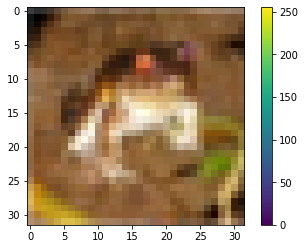

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

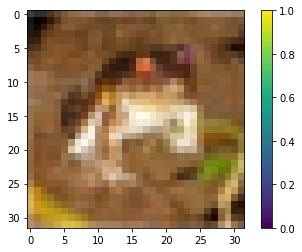

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

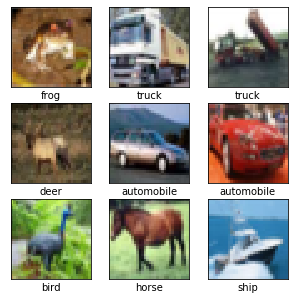

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 31s 612us/sample - loss: 1.6224 - accuracy: 0.4025 - val_loss: 1.4015 - val_accuracy: 0.4867
Epoch 2/10
50000/50000 [==============================] - 33s 653us/sample - loss: 1.3586 - accuracy: 0.5032 - val_loss: 1.3817 - val_accuracy: 0.4926
Epoch 3/10
50000/50000 [==============================] - 35s 706us/sample - loss: 1.2734 - accuracy: 0.5371 - val_loss: 1.3088 - val_accuracy: 0.5169
Epoch 4/10
50000/50000 [==============================] - 40s 804us/sample - loss: 1.2063 - accuracy: 0.5602 - val_loss: 1.2995 - val_accuracy: 0.5316
Epoch 5/10
50000/50000 [==============================] - 45s 896us/sample - loss: 1.1515 - accuracy: 0.5809 - val_loss: 1.3082 - val_accuracy: 0.5327
Epoch 6/10
50000/50000 [==============================] - 46s 929us/sample - loss: 1.0897 - accuracy: 0.6052 - val_loss: 1.2667 - val_accuracy: 0.5504
Epoch 7/10
50000/50000 [====================

In [13]:
import sys; sys.path.append('..')
from common.plot_util import eval_metric
EPOCHS=10

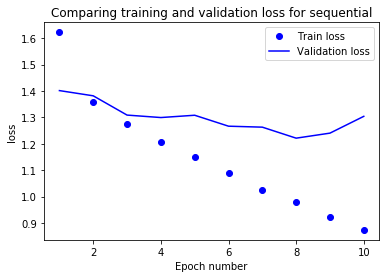

In [14]:
%matplotlib inline
eval_metric(model,history, 'loss',EPOCHS)

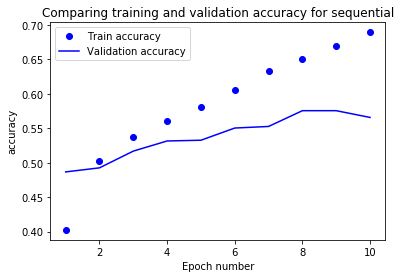

In [15]:
eval_metric(model,history, 'accuracy',EPOCHS)